In [2]:
!pip install seaborn
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
import numpy as np
import math
from sklearn.preprocessing import FunctionTransformer
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Loading data
os.chdir('final_provider')
glob.glob('*.csv')
#phone_df = pd.read_csv('final_provider/phone.csv')

['personal.csv', 'contract.csv', 'phone.csv', 'internet.csv']

In [10]:
dfs = dict(map(lambda f:(os.path.basename(f).replace('.csv', ''), pd.read_csv(f)), glob.glob('*.csv')))

In [11]:
def info_(df, sample_n):
    df_sample = df.sample(sample_n)
    df_info = df.info()
    print(f"{sample_n} SIZED SAMPLE")
    print()
    print(df_sample)
    print()
    print(df_info)

In [12]:
def run_function(dfs, function, *fun_args):
    for name, features in dfs.items():
        print(50*"-"+name.upper()+50*"-")
        print(function(dfs[name], *fun_args))
run_function(dfs, info_, 5)

--------------------------------------------------PERSONAL--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
5 SIZED SAMPLE

      customerID  gender  SeniorCitizen Partner Dependents
5575  1492-KGETH    Male              0     Yes        Yes
334   2868-SNELZ  Female              0      No         No
4728  6119-SPUDB    Male              0      No         No
2348  2683-JXWQQ    Male              0     Yes        Yes
1144  0841-NULXI    Male              0      No         No

None
None
--------------------------------------------------C

In [13]:
def study_null(df, null_only=False):
    null_sum = df.isna().sum()
    df_null = pd.concat([df.dtypes, null_sum, null_sum / len(df) * 100], axis=1)
    df_null.columns = ["dtypes", "null_count", "missing_%"]
    if null_only:
        df_null = df_null[df_null['null_count'] > 0]
    df_null.sort_values(by='missing_%', ascending=False)
    return df_null

In [14]:
run_function(dfs, study_null)

--------------------------------------------------PERSONAL--------------------------------------------------
               dtypes  null_count  missing_%
customerID     object           0        0.0
gender         object           0        0.0
SeniorCitizen   int64           0        0.0
Partner        object           0        0.0
Dependents     object           0        0.0
--------------------------------------------------CONTRACT--------------------------------------------------
                   dtypes  null_count  missing_%
customerID         object           0        0.0
BeginDate          object           0        0.0
EndDate            object           0        0.0
Type               object           0        0.0
PaperlessBilling   object           0        0.0
PaymentMethod      object           0        0.0
MonthlyCharges    float64           0        0.0
TotalCharges       object           0        0.0
--------------------------------------------------PHONE----------------

In [15]:
def describe_full(df):
    df_describe = df.describe().T
    df_numeric = df._get_numeric_data()
    df_describe['dtypes'] = df_numeric.dtypes
    df_describe['missing_%'] = df_numeric.isna().sum() / len(df_numeric) * 100
    cardinality = df_numeric.apply(pd.Series.nunique)
    df_describe['Cardinality'] = cardinality
    df_describe['Skew'] = df_numeric.skew(axis=0, skipna=False)
    return df_describe

In [16]:
run_function(dfs, describe_full)

--------------------------------------------------PERSONAL--------------------------------------------------
                count      mean       std  min  25%  50%  75%  max dtypes  \
SeniorCitizen  7043.0  0.162147  0.368612  0.0  0.0  0.0  0.0  1.0  int64   

               missing_%  Cardinality      Skew  
SeniorCitizen        0.0            2  1.833633  
--------------------------------------------------CONTRACT--------------------------------------------------
                 count       mean        std    min   25%    50%    75%  \
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max   dtypes  missing_%  Cardinality      Skew  
MonthlyCharges  118.75  float64        0.0         1585 -0.220524  
--------------------------------------------------PHONE--------------------------------------------------
              count unique         top  freq dtypes  missing_%  Cardinality  \
customerID     6361   6361  3186-AJIEK     1    NaN    

In [17]:
dfs['contract']['MonthlyCharges'].hist()

<Axes: >

In [18]:
dfs['internet']['StreamingMovies'].isna().sum()

np.int64(0)

Merge dataframes

In [19]:
telecom_df = (dfs['personal']
             .merge(dfs['contract'], how='left', on='customerID')
             .merge(dfs['internet'], how='left', on='customerID')
             .merge(dfs['phone'], how='left', on='customerID'))

In [20]:
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,DSL,Yes,No,No,No,No,No,NaN
7041,8361-LTMKD,Male,1,Yes,No,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6,Fiber optic,No,No,No,No,No,No,Yes


In [21]:
study_null(telecom_df)

,dtypes,null_count,missing_%
customerID,object,0,0.000000
gender,object,0,0.000000
SeniorCitizen,int64,0,0.000000
Partner,object,0,0.000000
Dependents,object,0,0.000000
BeginDate,object,0,0.000000
EndDate,object,0,0.000000
Type,object,0,0.000000
PaperlessBilling,object,0,0.000000
PaymentMethod,object,0,0.000000


features related to internet services have significant amount of missing values.
Suppose, customers with missing values do not use internet services - just phone.

In [22]:
def na_to_no(df, *features):
    for feature in [*features]:
        df[feature] = df[feature].fillna("No")
na_to_no(telecom_df, 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'MultipleLines')
telecom_df['InternetService'] = telecom_df['InternetService'].fillna('No service')

In [23]:
study_null(telecom_df)

,dtypes,null_count,missing_%
customerID,object,0,0.0
gender,object,0,0.0
SeniorCitizen,int64,0,0.0
Partner,object,0,0.0
Dependents,object,0,0.0
BeginDate,object,0,0.0
EndDate,object,0,0.0
Type,object,0,0.0
PaperlessBilling,object,0,0.0
PaymentMethod,object,0,0.0


In [24]:
telecom_df.iloc[753] # just to compare with preprocessed result

customerID            3115-CZMZD
gender                      Male
SeniorCitizen                  0
Partner                       No
Dependents                   Yes
BeginDate             2020-02-01
EndDate                       No
Type                    Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             20.25
TotalCharges                    
InternetService       No service
OnlineSecurity                No
OnlineBackup                  No
DeviceProtection              No
TechSupport                   No
StreamingTV                   No
StreamingMovies               No
MultipleLines                 No
Name: 753, dtype: object

In [25]:
def convert_type(df):
    for col in df.select_dtypes('object').columns:
        if sorted(df[col].dropna().unique())==['No', 'Yes']:
            # df[col] = (df[col] == 'Yes').astype('int')
            df[col] = df[col].map({'No': 0, 'Yes': 1})
        elif sorted(df[col].dropna().unique())==['False', 'True']:
            df[col] = df[col].map({'False': 0, 'True': 1})
    return df

telecom_df = convert_type(telecom_df)
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,1,0,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,DSL,0,1,0,0,0,0,0
1,5575-GNVDE,Male,0,0,0,2017-04-01,No,One year,0,Mailed check,56.95,1889.5,DSL,1,0,1,0,0,0,0
2,3668-QPYBK,Male,0,0,0,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,DSL,1,1,0,0,0,0,0
3,7795-CFOCW,Male,0,0,0,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.75,DSL,1,0,1,1,0,0,0
4,9237-HQITU,Female,0,0,0,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,Fiber optic,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,2018-02-01,No,One year,1,Mailed check,84.80,1990.5,DSL,1,0,1,1,1,1,1
7039,2234-XADUH,Female,0,1,1,2014-02-01,No,One year,1,Credit card (automatic),103.20,7362.9,Fiber optic,0,1,1,0,1,1,1
7040,4801-JZAZL,Female,0,1,1,2019-03-01,No,Month-to-month,1,Electronic check,29.60,346.45,DSL,1,0,0,0,0,0,0
7041,8361-LTMKD,Male,1,1,0,2019-07-01,2019-11-01 00:00:00,Month-to-month,1,Mailed check,74.40,306.6,Fiber optic,0,0,0,0,0,0,1


In [26]:
telecom_df.iloc[753]

customerID            3115-CZMZD
gender                      Male
SeniorCitizen                  0
Partner                        0
Dependents                     1
BeginDate             2020-02-01
EndDate                       No
Type                    Two year
PaperlessBilling               0
PaymentMethod       Mailed check
MonthlyCharges             20.25
TotalCharges                    
InternetService       No service
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
MultipleLines                  0
Name: 753, dtype: object

now gender type convertion

In [27]:
telecom_df['gender'] = telecom_df['gender'].map({'Male': 1, 'Female': 0})

In [28]:
telecom_df.iloc[753]

customerID            3115-CZMZD
gender                         1
SeniorCitizen                  0
Partner                        0
Dependents                     1
BeginDate             2020-02-01
EndDate                       No
Type                    Two year
PaperlessBilling               0
PaymentMethod       Mailed check
MonthlyCharges             20.25
TotalCharges                    
InternetService       No service
OnlineSecurity                 0
OnlineBackup                   0
DeviceProtection               0
TechSupport                    0
StreamingTV                    0
StreamingMovies                0
MultipleLines                  0
Name: 753, dtype: object

In [29]:
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,0,0,1,0,2020-01-01,No,Month-to-month,1,Electronic check,29.85,29.85,DSL,0,1,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,2017-04-01,No,One year,0,Mailed check,56.95,1889.5,DSL,1,0,1,0,0,0,0
2,3668-QPYBK,1,0,0,0,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,53.85,108.15,DSL,1,1,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,2016-05-01,No,One year,0,Bank transfer (automatic),42.30,1840.75,DSL,1,0,1,1,0,0,0
4,9237-HQITU,0,0,0,0,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,70.70,151.65,Fiber optic,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,2018-02-01,No,One year,1,Mailed check,84.80,1990.5,DSL,1,0,1,1,1,1,1
7039,2234-XADUH,0,0,1,1,2014-02-01,No,One year,1,Credit card (automatic),103.20,7362.9,Fiber optic,0,1,1,0,1,1,1
7040,4801-JZAZL,0,0,1,1,2019-03-01,No,Month-to-month,1,Electronic check,29.60,346.45,DSL,1,0,0,0,0,0,0
7041,8361-LTMKD,1,1,1,0,2019-07-01,2019-11-01 00:00:00,Month-to-month,1,Mailed check,74.40,306.6,Fiber optic,0,0,0,0,0,0,1


In [30]:
# row 753 has empty TotalCharges - this feature need to be checked
telecom_df[telecom_df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,0,0,1,1,2020-02-01,No,Two year,1,Bank transfer (automatic),52.55,,DSL,1,0,1,1,1,0,0
753,3115-CZMZD,1,0,0,1,2020-02-01,No,Two year,0,Mailed check,20.25,,No service,0,0,0,0,0,0,0
936,5709-LVOEQ,0,0,1,1,2020-02-01,No,Two year,0,Mailed check,80.85,,DSL,1,1,1,0,1,1,0
1082,4367-NUYAO,1,0,1,1,2020-02-01,No,Two year,0,Mailed check,25.75,,No service,0,0,0,0,0,0,1
1340,1371-DWPAZ,0,0,1,1,2020-02-01,No,Two year,0,Credit card (automatic),56.05,,DSL,1,1,1,1,1,0,0
3331,7644-OMVMY,1,0,1,1,2020-02-01,No,Two year,0,Mailed check,19.85,,No service,0,0,0,0,0,0,0
3826,3213-VVOLG,1,0,1,1,2020-02-01,No,Two year,0,Mailed check,25.35,,No service,0,0,0,0,0,0,1
4380,2520-SGTTA,0,0,1,1,2020-02-01,No,Two year,0,Mailed check,20.00,,No service,0,0,0,0,0,0,0
5218,2923-ARZLG,1,0,1,1,2020-02-01,No,One year,1,Mailed check,19.70,,No service,0,0,0,0,0,0,0
6670,4075-WKNIU,0,0,1,1,2020-02-01,No,Two year,0,Mailed check,73.35,,DSL,0,1,1,1,1,0,1


seems like contract that started on and after 2020-02-01 have no TotalCharges yet

In [31]:
# converts strings to floats and handles conversion erro by converting 'non-numeric' strings to Nan. Then fills nulls with 0.0
telecom_df['TotalCharges'] = pd.to_numeric(telecom_df['TotalCharges'], errors='coerce').fillna(0.0)

In [32]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   int64  
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   float64
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   int64  
 14  OnlineBackup      7043 non-null   int64  
 15  DeviceProtection  7043 non-null   int64  
 16  TechSupport       7043 non-null   int64  


target variable is contract that has ended, because renewed contract has no end date yet

In [36]:
telecom_df['churn'] = (telecom_df['EndDate'] != 'No').astype('int')

In [37]:
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn
0,7590-VHVEG,0,0,1,0,2020-01-01,No,Month-to-month,1,Electronic check,...,29.85,DSL,0,1,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,2017-04-01,No,One year,0,Mailed check,...,1889.50,DSL,1,0,1,0,0,0,0,0
2,3668-QPYBK,1,0,0,0,2019-10-01,2019-12-01 00:00:00,Month-to-month,1,Mailed check,...,108.15,DSL,1,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,2016-05-01,No,One year,0,Bank transfer (automatic),...,1840.75,DSL,1,0,1,1,0,0,0,0
4,9237-HQITU,0,0,0,0,2019-09-01,2019-11-01 00:00:00,Month-to-month,1,Electronic check,...,151.65,Fiber optic,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,2018-02-01,No,One year,1,Mailed check,...,1990.50,DSL,1,0,1,1,1,1,1,0
7039,2234-XADUH,0,0,1,1,2014-02-01,No,One year,1,Credit card (automatic),...,7362.90,Fiber optic,0,1,1,0,1,1,1,0
7040,4801-JZAZL,0,0,1,1,2019-03-01,No,Month-to-month,1,Electronic check,...,346.45,DSL,1,0,0,0,0,0,0,0
7041,8361-LTMKD,1,1,1,0,2019-07-01,2019-11-01 00:00:00,Month-to-month,1,Mailed check,...,306.60,Fiber optic,0,0,0,0,0,0,1,1


In [38]:
final_df = telecom_df.drop(['BeginDate', 'EndDate'], axis=1)

<Axes: xlabel='churn', ylabel='count'>

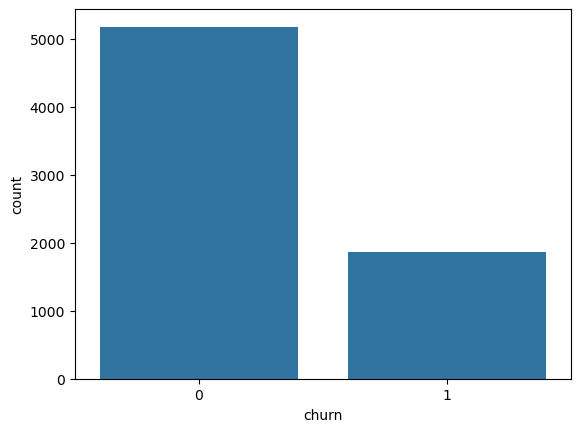

In [50]:
sns.countplot(x='churn', data=final_df)
plt.show()

In [46]:
final_df

,customerID,gender,SeniorCitizen,Partner,Dependents,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,churn
0,7590-VHVEG,0,0,1,0,Month-to-month,1,Electronic check,29.85,29.85,DSL,0,1,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0,One year,0,Mailed check,56.95,1889.50,DSL,1,0,1,0,0,0,0,0
2,3668-QPYBK,1,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,DSL,1,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,DSL,1,0,1,1,0,0,0,0
4,9237-HQITU,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Fiber optic,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,One year,1,Mailed check,84.80,1990.50,DSL,1,0,1,1,1,1,1,0
7039,2234-XADUH,0,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,Fiber optic,0,1,1,0,1,1,1,0
7040,4801-JZAZL,0,0,1,1,Month-to-month,1,Electronic check,29.60,346.45,DSL,1,0,0,0,0,0,0,0
7041,8361-LTMKD,1,1,1,0,Month-to-month,1,Mailed check,74.40,306.60,Fiber optic,0,0,0,0,0,0,1,1


In [49]:
final_df['churn'].unique()

array([0, 1])